# 1-2-3... Image Styling using Deep Learning!

Neural style transfer is a technique outlined in Leon A. Gatys' paper, A Neural Algorithm of Artistic Style. https://arxiv.org/abs/1508.06576

Also, see https://medium.com/tensorflow/neural-style-transfer-creating-art-with-deep-learning-using-tf-keras-and-eager-execution-7d541ac31398

Input: Two images, one for the content and the other for the styling.

Output: Image with the content from the content image and the style from the style image.

The technique uses two loss/distance functions, L_style and L_content. The final image is the result of minimizing the content and style losses using backpropagation/gradient descent.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)
mpl.rcParams['axes.grid'] = False

import numpy as np
from PIL import Image
import time
import functools

import tensorflow as tf
import tensorflow.contrib.eager as tfe
from keras.preprocessing import image as kp_image
from tensorflow.keras.models import Model
from keras import losses
from keras import layers
from keras import backend as K

from stm_model import StyleTransferModel
import transfer_tools as tt


Using TensorFlow backend.


In [2]:
#tt.save_vgg_to_file()

### 1. Download Images 

In [3]:
import os
import requests
import shutil

img_dir = 'images'
current_path = os.getcwd()
folder_path = os.path.join(current_path, "images")
if not os.path.exists(folder_path):
    os.mkdir(img_dir)
    
def get_style_image(style_url):
    r = requests.get(style_url, stream=True)
    if r.status_code == 200:
        with open("images/style.png", 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)
        
def get_content_image(content_url):
    r = requests.get(content_url, stream=True)
    if r.status_code == 200:
        with open("images/content.png", 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)

style_url = "https://uploads4.wikiart.org/images/rembrandt/christ-in-the-storm-1633.jpg!PinterestSmall.jpg"
get_style_image(style_url)

content_url = "https://uploads4.wikiart.org/images/amedeo-modigliani/portrait-of-maude-abrantes-1907(1).jpg!PinterestSmall.jpg"
get_content_image(content_url)



### 1a. Enable Eager Execution

Enabling eager execution changes how TensorFlow operations behave—now they immediately evaluate and return their values to Python. 

In [4]:
tf.enable_eager_execution()
print("Eager execution: {}".format(tf.executing_eagerly()))

Eager execution: True


### 1b. The Content and Style Images

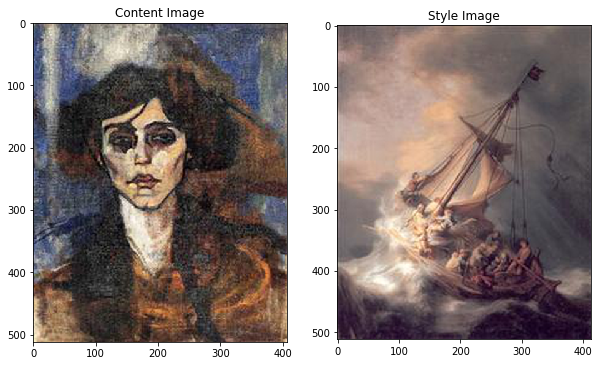

In [5]:
content_path = os.path.join(current_path, "images/content.png")
style_path = os.path.join(current_path, "images/style.png")

plt.figure(figsize=(10,10))

content = tt.load_img(content_path).astype('uint8')
style = tt.load_img(style_path).astype('uint8')

plt.subplot(1, 2, 1)
tt.imshow(content, 'Content Image')

plt.subplot(1, 2, 2)
tt.imshow(style, 'Style Image')
plt.show()

### 2. Start the Style Transfer Process

We used a pretrained image model, VGG19 and its intermediate layers to get both the style and content representations of the final image. VGG19 takes a raw image as imput pixels and builds an internal representaion 

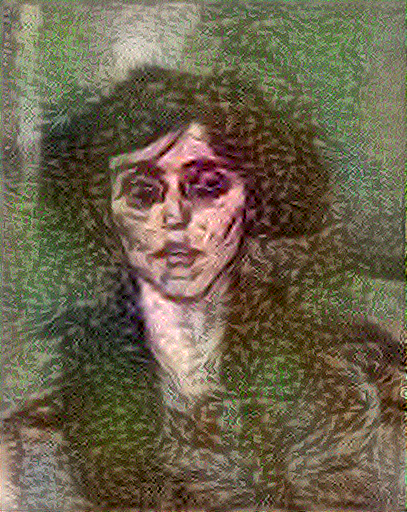

Iteration: 110
Total loss: 2.7306e+06, style loss: 2.0047e+06, content loss: 7.2592e+05, time: 0.0877s
Total time: 1404.7174s


In [6]:
stm = StyleTransferModel()
imgs, best, best_loss = stm.run_style_transfer(content_path, style_path, num_iterations=120)

In [7]:
for i,img in enumerate(imgs):
    actual_img = Image.fromarray(img)
    file_name = 'static/12-iterations/nst'+str(i)+'.png'
    actual_img.save(file_name)

### 3. The Result

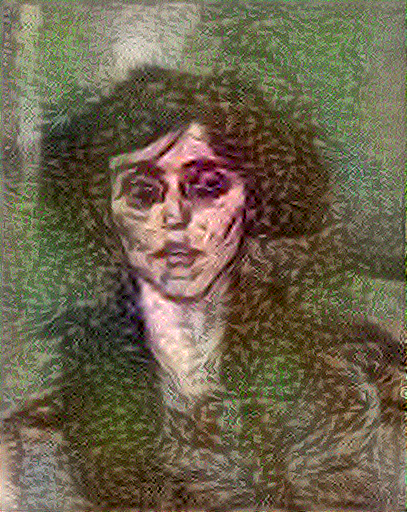

In [8]:
Image.fromarray(best)

In [9]:
actual_img = Image.fromarray(best)
file_name = 'static/result/best.png'
actual_img.save(file_name)
file_name = 'static/gallery/best.png'
actual_img.save(file_name)

Other references:
     https://stackoverflow.com/questions/21227078/convert-base64-to-image-in-javascript-jquery) or save the images to a file and return the urls to the image

and  https://reiinakano.com/arbitrary-image-stylization-tfjs/ (edited)
